# Is the sunshine at a place affected by topography? 


In [1]:
import numpy as np
import pandas as pd

import proplot as plot


from sunhours_calc import sunHours,azimuth_matrix_factory
import sunhours_plot as sunPlot

AttributeError: module 'matplotlib.cbook' has no attribute '_suppress_matplotlib_deprecation_warning'

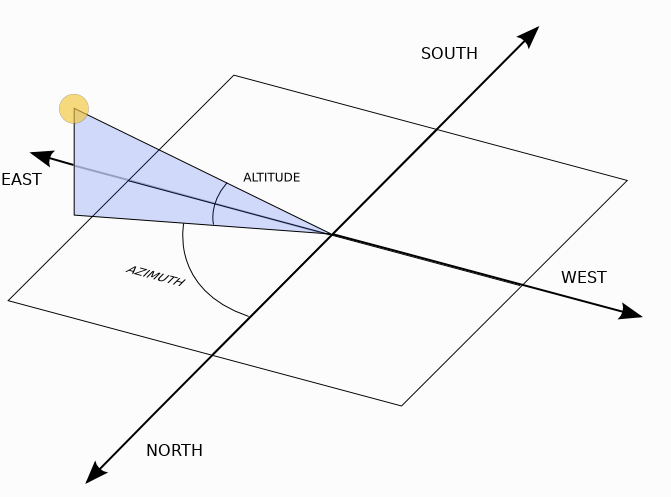


How many theoretical sun hours will a place get during a year? And how much of it is blocked by topography? We consider the high-resolution topography within 10 km from the place of interest, defined by latitude and longitude. We interpolate topography to go along a straight azimuth angle, and then use the topography to find the largest angle from the house. If the elevation angle of the sun is larger than the topography angle in the same azimuth angle, we consider the place to get sun. 


# How much sun does this house actually get? 

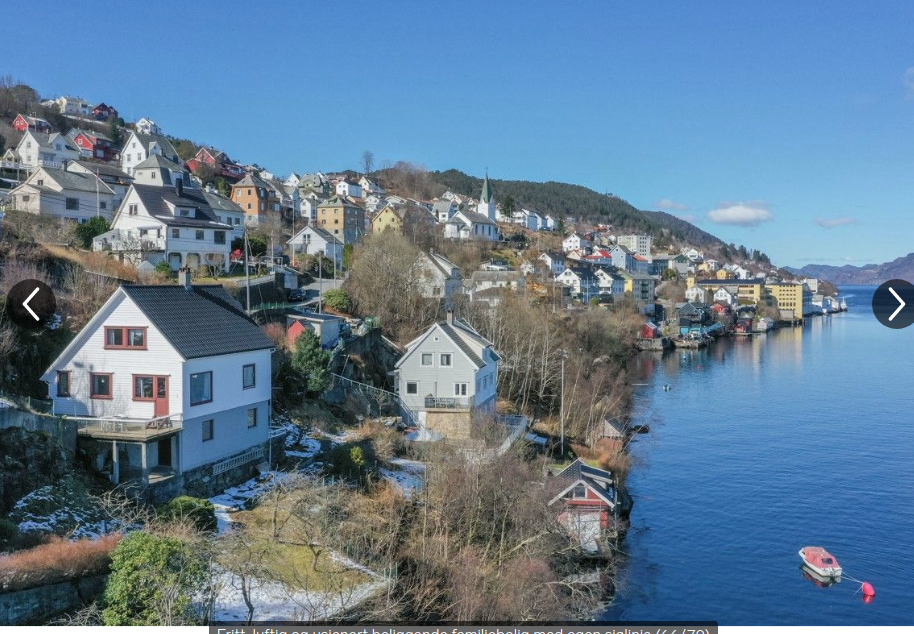



---
First, initial the location and the dates, in this case, we are interested in the sun conditions during the entire year

In [6]:
test_places = {'Arna'        : (60.456752213904245,5.443853229924588),
               'Arna garden' : (60.456442102568566, 5.4440318839352555),
               'Lerkerinden' : (60.34208077176912, 5.362093098116615),
               'Hjemme'      : (60.378224338465834, 5.327000241043094),
            #   'GFI'         : (60.38376434332239, 5.331910883373496),
            #   'Askoy'       : (60.42224944507916, 5.233487259204554),
         #      'Dale'        : (60.59119166539618, 5.8217701204849535),
               'Fanahammeren' : (60.261603023288444, 5.336573727760071),
               'Strusshamn'   : (60.40362682907784, 5.19388634515462)
              }


dates=pd.date_range('01-01-2021','12-31-2021',freq='10T',tz='Europe/Oslo')

In [7]:
sun_test     = {}
topo_test    = {}
horizon_test = {}
for place in test_places:
    lat, lon = test_places[place]
    _topo,_angles,_sunDF = sunHours(lon,lat,dates,buffer=10,reso='hi')
    
    sun_test[place]     = _sunDF
    topo_test[place]    = _topo
    horizon_test[place] = _angles

preparing azimuth matrix ...
finding sun hours ...
finsihed
preparing azimuth matrix ...
finding sun hours ...
finsihed
preparing azimuth matrix ...
finding sun hours ...
finsihed
preparing azimuth matrix ...
finding sun hours ...
finsihed
preparing azimuth matrix ...
finding sun hours ...
finsihed
preparing azimuth matrix ...
finding sun hours ...
finsihed


NameError: name 'topo_L' is not defined

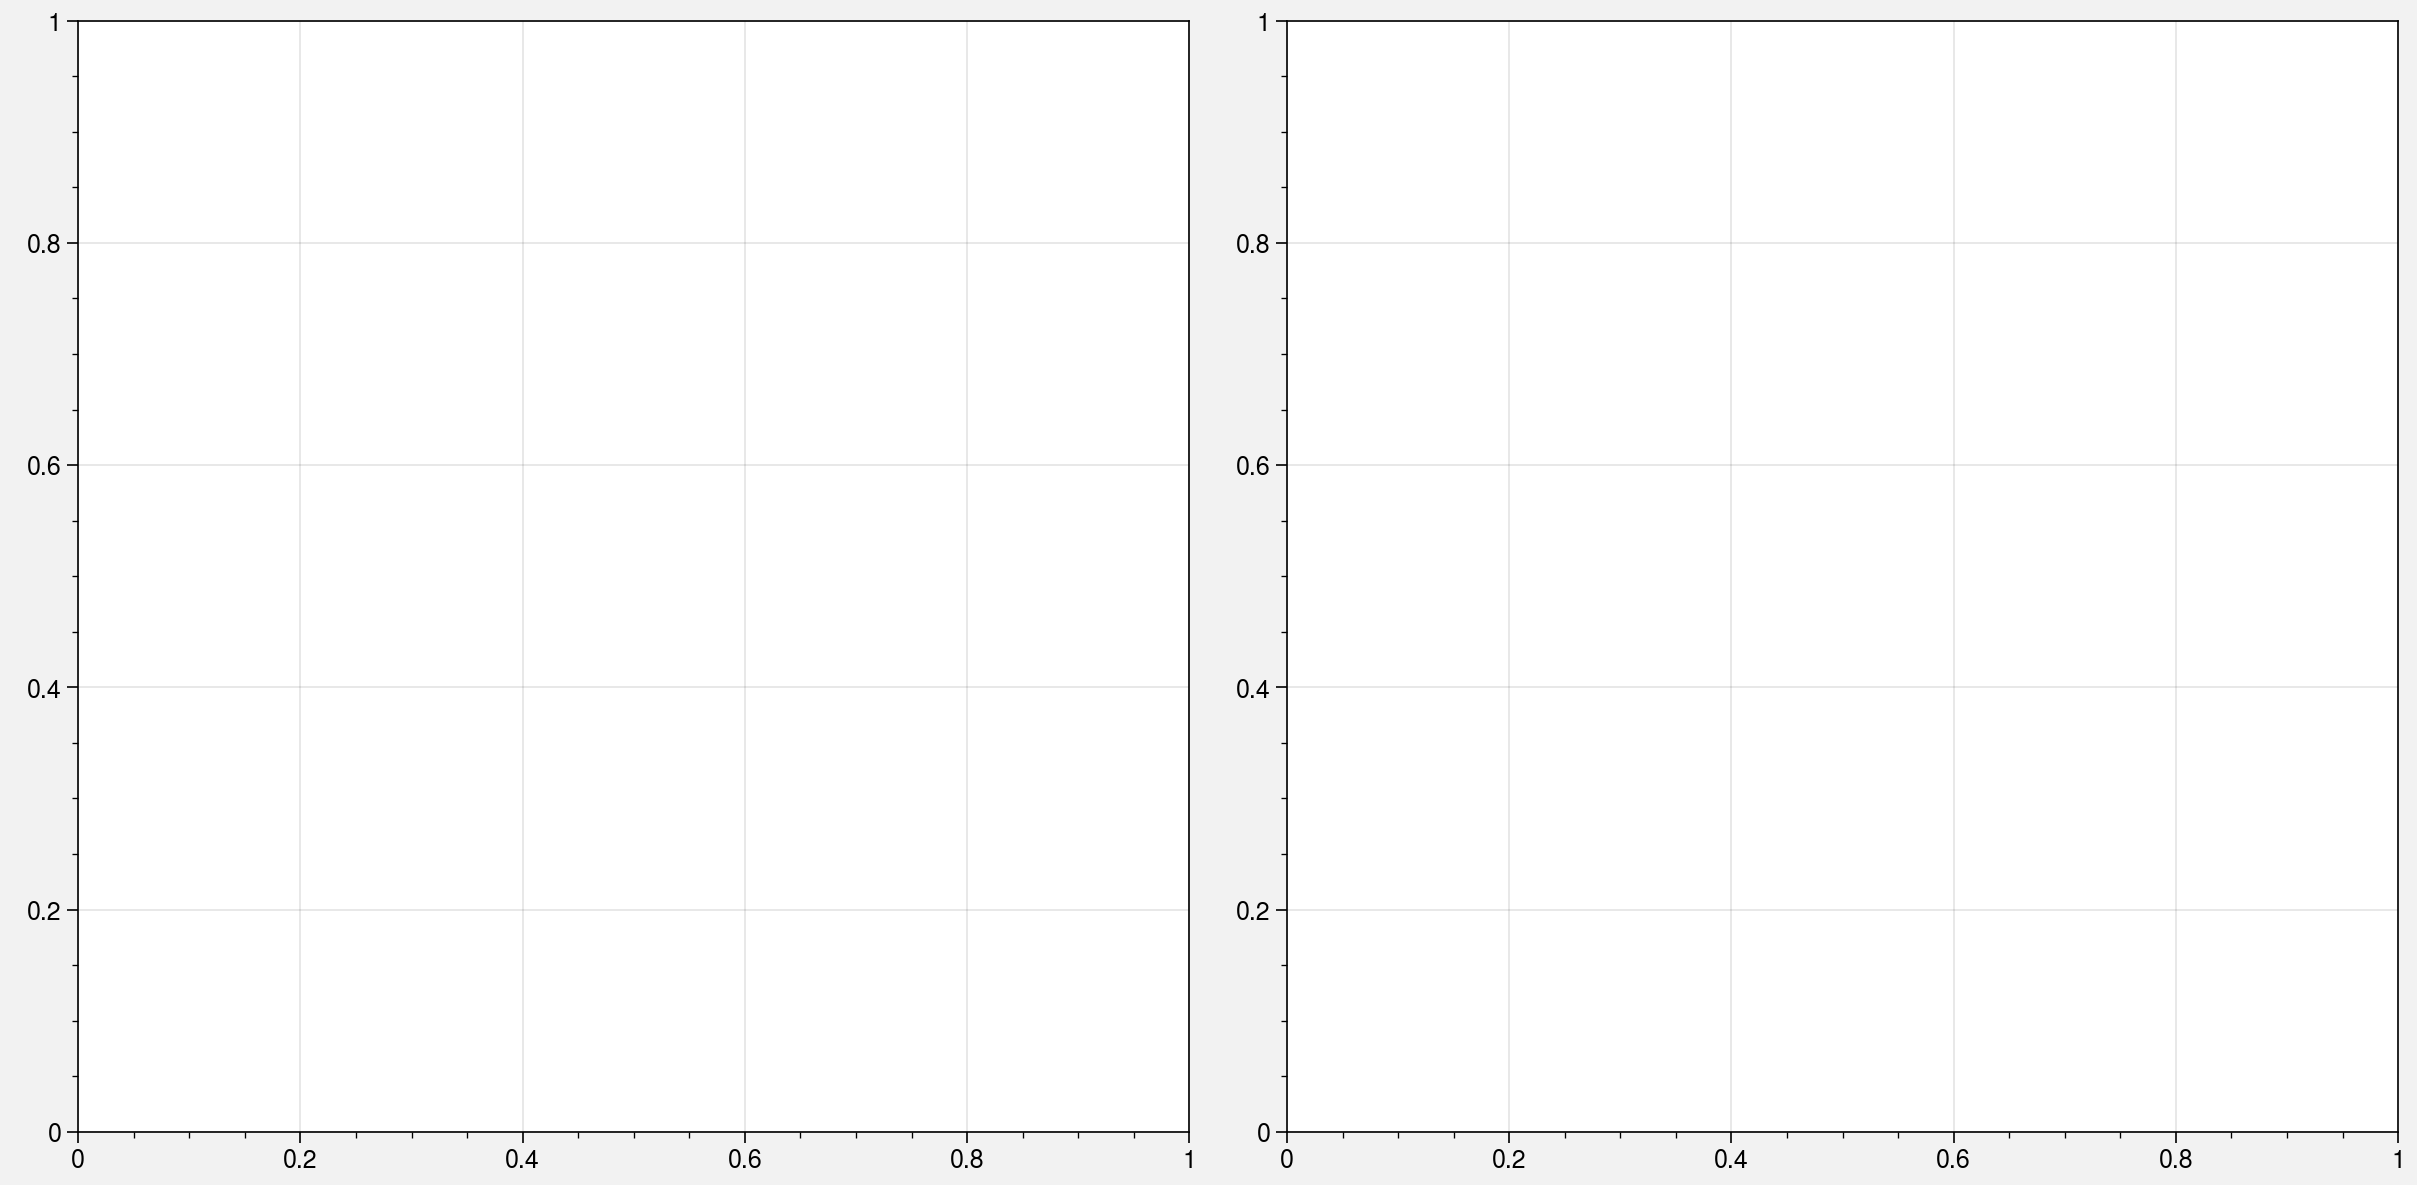

In [8]:
fig,ax = plot.subplots(ncols=2,sharey=False)
plot.rc['font.size']=20
ax[0].imshow(topo_L,colorbar='r',levels=np.arange(0,600,1))
ax[1].plot(mtrx_L.angle)
#ax[1].plot(mtrx_10.angle)


In [ ]:
f,a   = sunPlot.plotActualAgainstTheory(sun_test['Fanahammeren'])

In [ ]:
fig,ax = plot.subplots(figsize=(4*1.5,4))
plot.rc['font.size']=10
for place in sun_test: 
    ax.plot(sun_test[place].loc['22-06-2021'].angle.values,label=place,cycle='Default',linewidth=3)
ax.plot(sun_test[place].loc['22-06-2021'].ze.values,color='gold')
ax.plot(sun_test[place].loc['22-12-2021'].ze.values,color='gold')

ax.format(ylim=[0,60])
ax.legend(loc='ul')